In [39]:
import torch
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
nt = 1000
nx = 101

nu = 0.1 # diffusion
# nu = (0.01/math.pi)

dt = 0.001
# dx = 2/(nx-1)

x = np.linspace(-1,1,nx)
dx = abs(x[0]-x[1])

In [41]:
x

array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ])

In [42]:
x[0]

-1.0

In [43]:
x[1]

-0.98

In [44]:
x[0]-x[1]

-0.020000000000000018

In [45]:
dx

0.020000000000000018

In [46]:
u = np.zeros(nx)
un = np.zeros(nx)

uf = np.zeros((nt,nx))

In [47]:
u = -np.sin(math.pi*x)

In [48]:
u

array([ 1.22464680e-16,  6.27905195e-02,  1.25333234e-01,  1.87381315e-01,
        2.48689887e-01,  3.09016994e-01,  3.68124553e-01,  4.25779292e-01,
        4.81753674e-01,  5.35826795e-01,  5.87785252e-01,  6.37423990e-01,
        6.84547106e-01,  7.28968627e-01,  7.70513243e-01,  8.09016994e-01,
        8.44327926e-01,  8.76306680e-01,  9.04827052e-01,  9.29776486e-01,
        9.51056516e-01,  9.68583161e-01,  9.82287251e-01,  9.92114701e-01,
        9.98026728e-01,  1.00000000e+00,  9.98026728e-01,  9.92114701e-01,
        9.82287251e-01,  9.68583161e-01,  9.51056516e-01,  9.29776486e-01,
        9.04827052e-01,  8.76306680e-01,  8.44327926e-01,  8.09016994e-01,
        7.70513243e-01,  7.28968627e-01,  6.84547106e-01,  6.37423990e-01,
        5.87785252e-01,  5.35826795e-01,  4.81753674e-01,  4.25779292e-01,
        3.68124553e-01,  3.09016994e-01,  2.48689887e-01,  1.87381315e-01,
        1.25333234e-01,  6.27905195e-02, -0.00000000e+00, -6.27905195e-02,
       -1.25333234e-01, -

In [49]:
len(u)

101

In [50]:
uf[0,:] = u

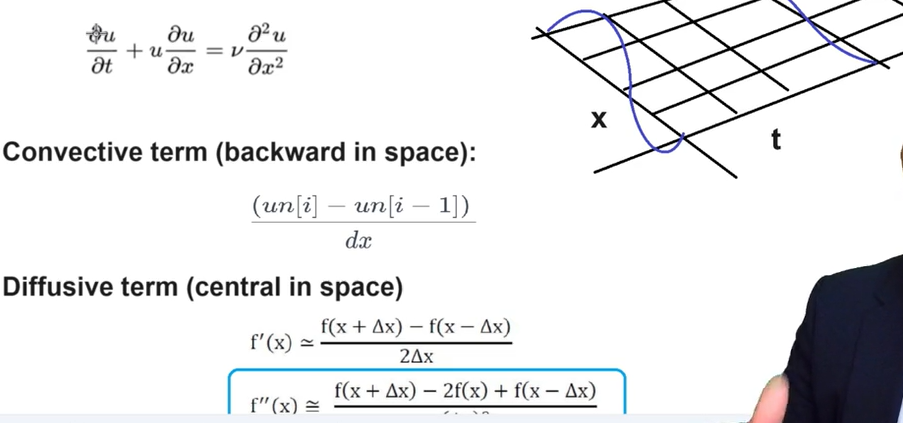

In [51]:
for n in range (1, nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * (dt/dx) * (un[i] - un[i-1]) + (nu * dt / (dx**2)) * (un[i+1] - 2 * un[i] + un[i-1])
        uf[n,i] = u[i]

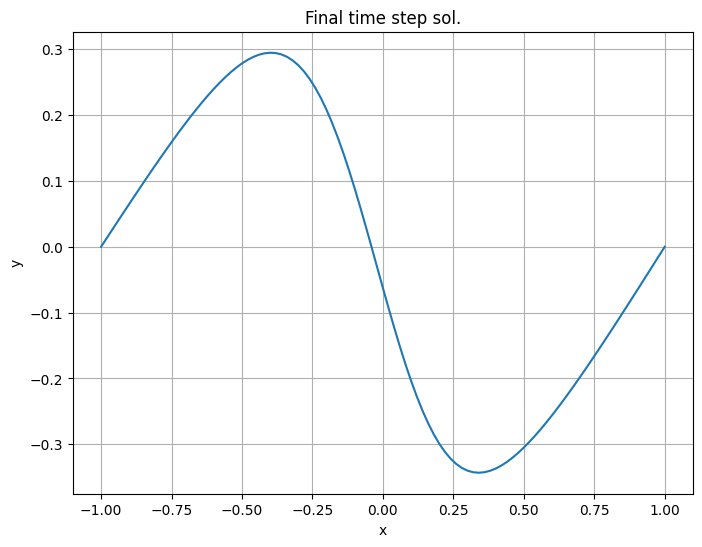

In [52]:
plt.figure(figsize=(8,6))
plt.plot(x,u, label="u Solution")
plt.title("Final time step sol.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

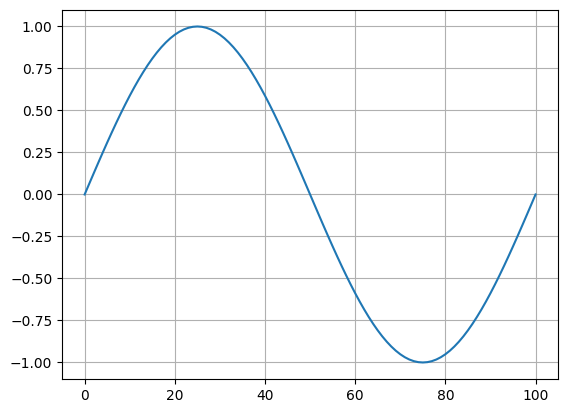

In [54]:
plt.plot(uf[0,:])
plt.grid(True)
plt.show()

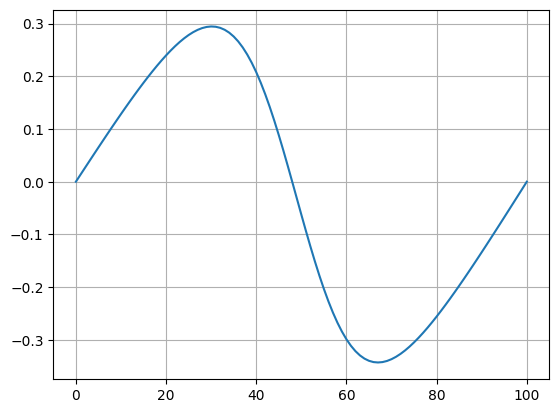

In [55]:
plt.plot(uf[-1,:])
plt.grid(True)
plt.show()

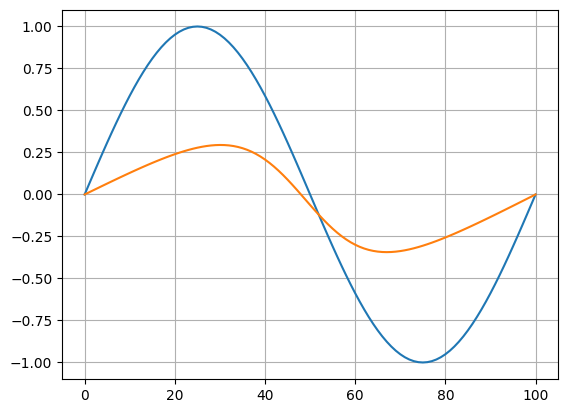

In [56]:
plt.plot(uf[0,:])
plt.plot(uf[-1,:])
plt.grid(True)
plt.show()

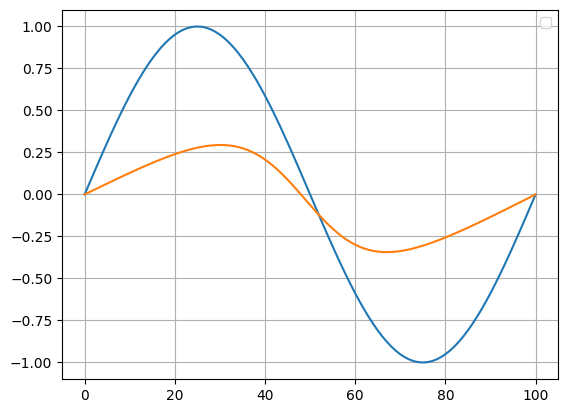

In [57]:
plt.plot(uf[0,:])
plt.plot(uf[-1,:])
plt.legend()
plt.grid(True)
plt.show()

In [58]:
sns.set_style("white")
plt.figure(figsize=(5,3), dpi=3000)
sns.heatmap(uf.T, cmap='jet')

<Axes: >